In [5]:
import sys
from skimage.exposure import exposure
from spine_detector.core import FilterUnit, ThresholdFilterUnit
from spine_detector.masking.gradient import get_gradient
from spine_detector.masking.gradient import box_filtering_via_gauss
from spine_detector.utils import load_mri, rescale_original_image
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.disable(sys.maxsize)

In [6]:
path = '../test-data/0001/T2_TSE_SAG_384_0002'
original_data = load_mri(path)
data = np.array([rescale_original_image(array.pixel_array) for array in original_data])

In [10]:
class NewFilterUnit(FilterUnit):
    def set_original_data(self, original_data):
        self.original_data = original_data
        self._normalized_data = np.power(original_data  / 255, 0.25) * 255

class NewThresholdFilterUnit(ThresholdFilterUnit):
    def set_original_data(self, original_data):
        self.original_data = original_data
        #self._normalized_data = np.power(original_data / 255, 0.25) * 255

unit = NewFilterUnit()
t_unit = NewThresholdFilterUnit()

unit.set_original_data(data)
t_unit.set_original_data(data)

Arg before log: 0.9346412226331778
{'threshold': 45}


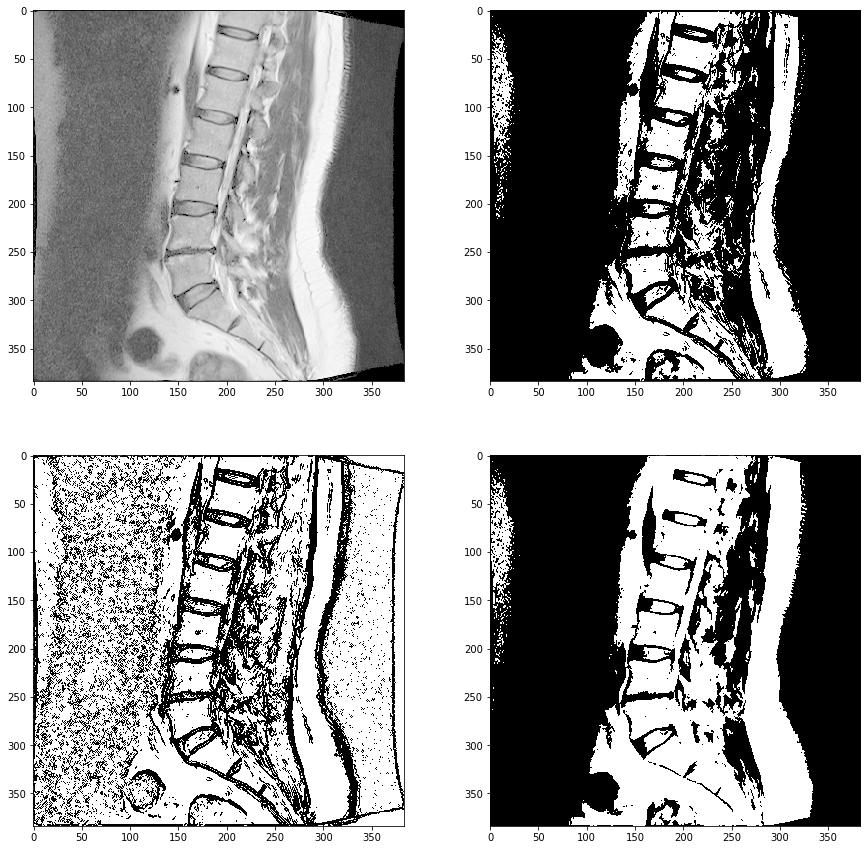

In [15]:
small_filter = {
    'infl_k': 0.9,
    'grad_degree': 0.001,
    'alpha': 0.2,
    'x': 0.1,
    'y': 0.09,
    'z': 0.09,
    'k_min': 21
}

t_params = {
    'threshold': 45
}

unit.update_filtration(small_filter)
t_unit.update_filtration(t_params)

slice_num = 5
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

t_mask = t_unit.get_filtered_image(slice_num)
small_mask = unit.get_filtered_image(slice_num)
norm_data = unit._normalized_data[slice_num]
original_data = unit.original_data[slice_num]
result_mask = t_mask * small_mask


ax[0, 0].imshow(norm_data, cmap='gray')
ax[0, 1].imshow(result_mask, cmap='gray')
ax[1, 0].imshow(small_mask, cmap='gray')
ax[1, 1].imshow(t_mask, cmap='gray')

plt.show()

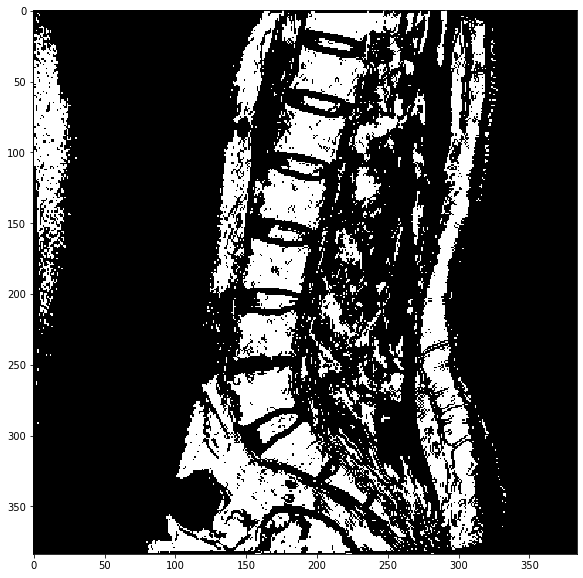

In [94]:
_, ax = plt.subplots(figsize=(10, 10))
ax.imshow(result_mask, cmap='gray')

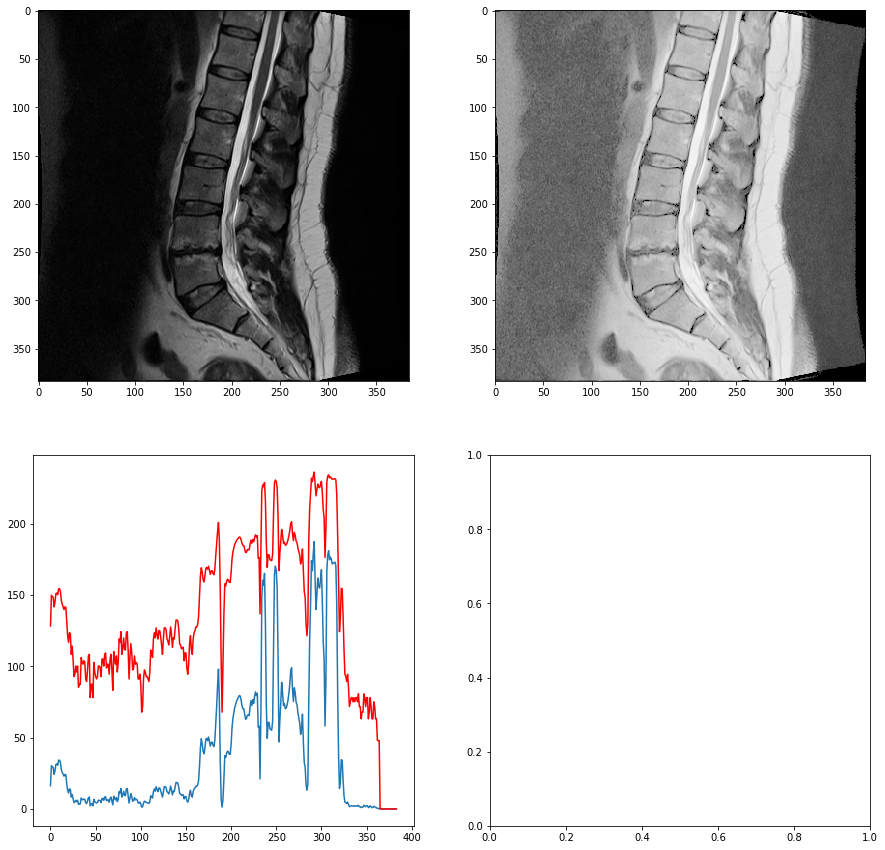

In [7]:
tst_image = data[7]
ranged_image =  np.power(tst_image / 255, .25) * 255
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))


ax[0,0].imshow(tst_image, cmap='gray')
ax[0,1].imshow(ranged_image, cmap='gray')

ax[1,0].plot(tst_image[15])
ax[1,0].plot(ranged_image[15], '-r')
plt.show()

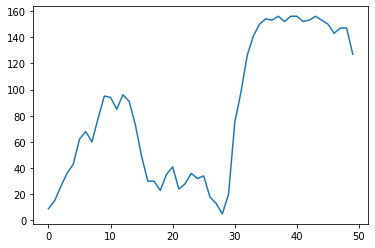